In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [88]:
from matplotlib import pyplot as plt
import logging

In [113]:
%cd "/gdrive/My Drive/Proyecto EL-7006/Repositorio Paper 2"
%ls

/gdrive/.shortcut-targets-by-id/1WxRDGEYCd3m0Vfl_juxdDQBgwJZ7Syf5/Docs universidad/University/2020-2/Redes Neuronales y Teoría de la información para el aprendizaje/Proyecto/Repositorio Paper 2
build/   causal.egg-info/  environment.yml  meeting2/  run.py    setup.py
causal/  data/             matlab/          README.md  scripts/  work/


In [15]:
%pip install -e .

Obtaining file:///gdrive/.shortcut-targets-by-id/1WxRDGEYCd3m0Vfl_juxdDQBgwJZ7Syf5/Docs%20universidad/University/2020-2/Redes%20Neuronales%20y%20Teori%CC%81a%20de%20la%20informacio%CC%81n%20para%20el%20aprendizaje/Proyecto/Repositorio%20Paper%202
  Created wheel for nauka: filename=nauka-0.0.13-cp36-none-any.whl size=18792 sha256=76f065f601f0b540624b7b9d15a43f4b78001b1310ca26bb799b4b77f1c75d83
  Stored in directory: /root/.cache/pip/wheels/c1/c0/6c/c0f1f3a99d7406cbb77a5e1fba1ba9259917ebd58f19eb8482
Successfully built nauka
  Running setup.py develop for causal


In [93]:
epochs = 5

# Corrida Chain3

In [94]:
!python run.py train -e {epochs} --seed 1 --train_functional 10000 --mopt adam:5e-2,0.9 --gopt adam:5e-3,0.1 -v 500 --lsparse 0.1 --bs 256 --ldag 0.5 --predict 100 --temperature 1 --limit-samples 500 -N 2 -p chain3

Streaming output truncated to the last 5000 lines.
       2   *  |
True edge: *        False positive: .        False negative: #
Hamming Distance @ Threshold 0.5:   0 (+0-0=2)
[2020-10-30 04:38:56.060 UTC ~~ INFO    ] Gamma CE:   0.27104538679122925
[2020-10-30 04:38:56.060 UTC ~~ INFO    ] Intervention Time (s):       0.3512599468231201
[2020-10-30 04:38:56.061 UTC ~~ INFO    ] Lsparse regularizer:         0.1
[2020-10-30 04:38:56.061 UTC ~~ INFO    ] 
[2020-10-30 04:38:56.290 UTC ~~ INFO    ] Predicted Intervention Node: [2]  Actual Intervention Node: [2]
[2020-10-30 04:38:56.331 UTC ~~ INFO    ] 
[2020-10-30 04:38:56.331 UTC ~~ INFO    ] **************************
[2020-10-30 04:38:56.332 UTC ~~ INFO    ] Gamma:      
tensor([[0.0000, 0.1344, 0.1253],
        [0.9580, 0.0000, 0.1104],
        [0.4747, 0.9543, 0.0000]])
[2020-10-30 04:38:56.332 UTC ~~ INFO    ] Gamma GT:   
         0       
       0      |
       1 *    |
       2   *  |
True edge: *        False positive: .       

In [95]:
%cd "/gdrive/My Drive/Proyecto EL-7006/Repositorio Paper 2"
%rm -fr work
!python scripts/strip_interrupts.py meeting2/chain/log.txt > meeting2/chain/STRIPPED_LOGFILE.txt
!python scripts/series_gammace.py meeting2/chain/STRIPPED_LOGFILE.txt > meeting2/chain/gammace.txt
!python scripts/series_auc.py meeting2/chain/STRIPPED_LOGFILE.txt > meeting2/chain/auc.txt

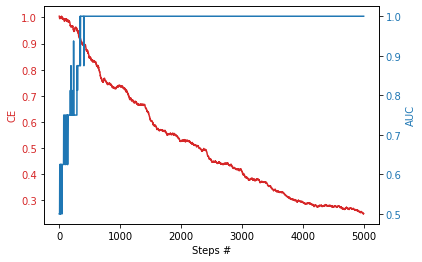

In [97]:
logging.basicConfig(level=logging.ERROR)

fig, ax = plt.subplots()

with open("meeting2/chain/gammace.txt", 'r') as f:
    gamma_ce_chain = [float(val.strip()) for val in f.readlines()]

with open("meeting2/chain/auc.txt", 'r') as f:
    auc_chain = [float(val.strip()) for val in f.readlines()]

color = 'tab:red'
ax.set_xlabel('Steps #')
ax.set_ylabel('CE', color=color)
ax.plot(gamma_ce_chain, color=color)
ax.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax.twinx()
ax2.set_ylabel('AUC', color=color)  # we already handled the x-label with ax1
ax2.plot(auc_chain, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Corrida Fork3

In [98]:
!python run.py train -e {epochs} --seed 1 --train_functional 10000 --mopt adam:5e-2,0.9 --gopt adam:5e-3,0.1 -v 500 --lsparse 0.1 --bs 256 --ldag 0.5 --predict 100 --temperature 1 --limit-samples 500 -N 2 -p fork3

Streaming output truncated to the last 5000 lines.
       2 *    |
True edge: *        False positive: .        False negative: #
Hamming Distance @ Threshold 0.5:   0 (+0-0=2)
[2020-10-30 05:15:33.620 UTC ~~ INFO    ] Gamma CE:   0.2478228360414505
[2020-10-30 05:15:33.620 UTC ~~ INFO    ] Intervention Time (s):       0.14251112937927246
[2020-10-30 05:15:33.620 UTC ~~ INFO    ] Lsparse regularizer:         0.1
[2020-10-30 05:15:33.620 UTC ~~ INFO    ] 
[2020-10-30 05:15:33.760 UTC ~~ INFO    ] Predicted Intervention Node: [2]  Actual Intervention Node: [2]
[2020-10-30 05:15:33.786 UTC ~~ INFO    ] 
[2020-10-30 05:15:33.787 UTC ~~ INFO    ] **************************
[2020-10-30 05:15:33.787 UTC ~~ INFO    ] Gamma:      
tensor([[0.0000, 0.1376, 0.0933],
        [0.9586, 0.0000, 0.2857],
        [0.9395, 0.2918, 0.0000]])
[2020-10-30 05:15:33.788 UTC ~~ INFO    ] Gamma GT:   
         0       
       0      |
       1 *    |
       2 *    |
True edge: *        False positive: .       

In [99]:
%cd "/gdrive/My Drive/Proyecto EL-7006/Repositorio Paper 2"
%rm -fr work
!python scripts/strip_interrupts.py meeting2/fork/log.txt > meeting2/fork/STRIPPED_LOGFILE.txt
!python scripts/series_gammace.py meeting2/fork/STRIPPED_LOGFILE.txt > meeting2/fork/gammace.txt
!python scripts/series_auc.py meeting2/fork/STRIPPED_LOGFILE.txt > meeting2/fork/auc.txt

/gdrive/.shortcut-targets-by-id/1WxRDGEYCd3m0Vfl_juxdDQBgwJZ7Syf5/Docs universidad/University/2020-2/Redes Neuronales y Teoría de la información para el aprendizaje/Proyecto/Repositorio Paper 2


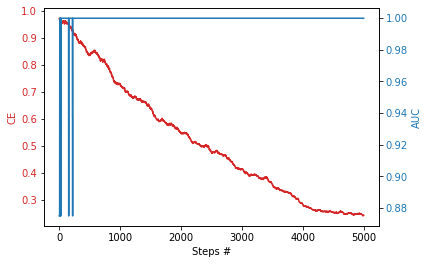

In [100]:
logging.basicConfig(level=logging.ERROR)

fig, ax = plt.subplots()

with open("meeting2/fork/gammace.txt", 'r') as f:
    gamma_ce_fork = [float(val.strip()) for val in f.readlines()]

with open("meeting2/fork/auc.txt", 'r') as f:
    auc_fork = [float(val.strip()) for val in f.readlines()]

color = 'tab:red'
ax.set_xlabel('Steps #')
ax.set_ylabel('CE', color=color)
ax.plot(gamma_ce_fork, color=color)
ax.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax.twinx()
ax2.set_ylabel('AUC', color=color)  # we already handled the x-label with ax1
ax2.plot(auc_fork, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Corrida Collider3

In [101]:
!python run.py train -e {epochs} --seed 1 --train_functional 10000 --mopt adam:5e-2,0.9 --gopt adam:5e-3,0.1 -v 500 --lsparse 0.1 --bs 256 --ldag 0.5 --predict 100 --temperature 1 --limit-samples 500 -N 2 -p collider3

Streaming output truncated to the last 5000 lines.
       2 * *  |
True edge: *        False positive: .        False negative: #
Hamming Distance @ Threshold 0.5:   0 (+0-0=2)
[2020-10-30 05:37:16.137 UTC ~~ INFO    ] Gamma CE:   0.24217885732650757
[2020-10-30 05:37:16.137 UTC ~~ INFO    ] Intervention Time (s):       0.16757917404174805
[2020-10-30 05:37:16.138 UTC ~~ INFO    ] Lsparse regularizer:         0.1
[2020-10-30 05:37:16.138 UTC ~~ INFO    ] 
[2020-10-30 05:37:16.284 UTC ~~ INFO    ] Predicted Intervention Node: [2]  Actual Intervention Node: [2]
[2020-10-30 05:37:16.316 UTC ~~ INFO    ] 
[2020-10-30 05:37:16.316 UTC ~~ INFO    ] **************************
[2020-10-30 05:37:16.317 UTC ~~ INFO    ] Gamma:      
tensor([[0.0000, 0.3576, 0.0791],
        [0.2275, 0.0000, 0.0762],
        [0.9203, 0.9406, 0.0000]])
[2020-10-30 05:37:16.317 UTC ~~ INFO    ] Gamma GT:   
         0       
       0      |
       1      |
       2 * *  |
True edge: *        False positive: .      

In [104]:
%cd "/gdrive/My Drive/Proyecto EL-7006/Repositorio Paper 2"
%rm -fr work
!python scripts/strip_interrupts.py meeting2/collider/log.txt > meeting2/collider/STRIPPED_LOGFILE.txt
!python scripts/series_gammace.py meeting2/collider/STRIPPED_LOGFILE.txt > meeting2/collider/gammace.txt
!python scripts/series_auc.py meeting2/collider/STRIPPED_LOGFILE.txt > meeting2/collider/auc.txt

/gdrive/.shortcut-targets-by-id/1WxRDGEYCd3m0Vfl_juxdDQBgwJZ7Syf5/Docs universidad/University/2020-2/Redes Neuronales y Teoría de la información para el aprendizaje/Proyecto/Repositorio Paper 2


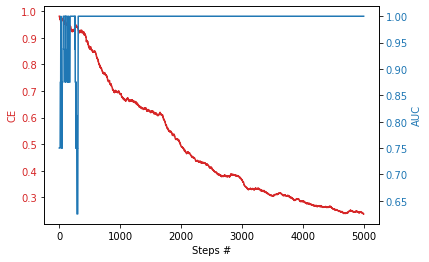

In [105]:
logging.basicConfig(level=logging.ERROR)

fig, ax = plt.subplots()

with open("meeting2/collider/gammace.txt", 'r') as f:
    gamma_ce_collider = [float(val.strip()) for val in f.readlines()]

with open("meeting2/collider/auc.txt", 'r') as f:
    auc_collider = [float(val.strip()) for val in f.readlines()]

color = 'tab:red'
ax.set_xlabel('Steps #')
ax.set_ylabel('CE', color=color)
ax.plot(gamma_ce_collider, color=color)
ax.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax.twinx()
ax2.set_ylabel('AUC', color=color)  # we already handled the x-label with ax1
ax2.plot(auc_collider, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Corrida Confounder3

In [114]:
!python run.py train -e {epochs} --seed 1 --train_functional 10000 --mopt adam:5e-2,0.9 --gopt adam:5e-3,0.1 -v 500 --lsparse 0.1 --bs 256 --ldag 0.5 --predict 100 --temperature 1 --limit-samples 500 -N 2 -p confounder3

Streaming output truncated to the last 5000 lines.
       2 * *  |
True edge: *        False positive: .        False negative: #
Hamming Distance @ Threshold 0.5:   0 (+0-0=3)
[2020-10-30 06:00:47.231 UTC ~~ INFO    ] Gamma CE:   0.1260358691215515
[2020-10-30 06:00:47.231 UTC ~~ INFO    ] Intervention Time (s):       0.1713240146636963
[2020-10-30 06:00:47.232 UTC ~~ INFO    ] Lsparse regularizer:         0.1
[2020-10-30 06:00:47.232 UTC ~~ INFO    ] 
[2020-10-30 06:00:47.370 UTC ~~ INFO    ] Predicted Intervention Node: [2]  Actual Intervention Node: [2]
[2020-10-30 06:00:47.397 UTC ~~ INFO    ] 
[2020-10-30 06:00:47.398 UTC ~~ INFO    ] **************************
[2020-10-30 06:00:47.399 UTC ~~ INFO    ] Gamma:      
tensor([[0.0000, 0.1592, 0.0660],
        [0.9585, 0.0000, 0.1011],
        [0.9268, 0.9431, 0.0000]])
[2020-10-30 06:00:47.399 UTC ~~ INFO    ] Gamma GT:   
         0       
       0      |
       1 *    |
       2 * *  |
True edge: *        False positive: .        

In [115]:
%cd "/gdrive/My Drive/Proyecto EL-7006/Repositorio Paper 2"
%rm -fr work
!python scripts/strip_interrupts.py meeting2/confounder/log.txt > meeting2/confounder/STRIPPED_LOGFILE.txt
!python scripts/series_gammace.py meeting2/confounder/STRIPPED_LOGFILE.txt > meeting2/confounder/gammace.txt
!python scripts/series_auc.py meeting2/confounder/STRIPPED_LOGFILE.txt > meeting2/confounder/auc.txt

/gdrive/.shortcut-targets-by-id/1WxRDGEYCd3m0Vfl_juxdDQBgwJZ7Syf5/Docs universidad/University/2020-2/Redes Neuronales y Teoría de la información para el aprendizaje/Proyecto/Repositorio Paper 2


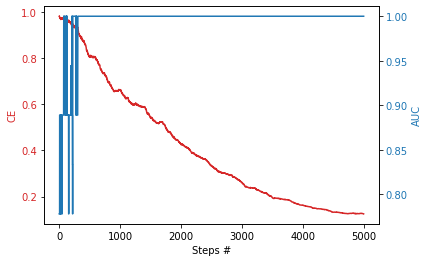

In [116]:
logging.basicConfig(level=logging.ERROR)

fig, ax = plt.subplots()

with open("meeting2/confounder/gammace.txt", 'r') as f:
    gamma_ce_confounder = [float(val.strip()) for val in f.readlines()]

with open("meeting2/confounder/auc.txt", 'r') as f:
    auc_confounder = [float(val.strip()) for val in f.readlines()]

color = 'tab:red'
ax.set_xlabel('Steps #')
ax.set_ylabel('CE', color=color)
ax.plot(gamma_ce_confounder, color=color)
ax.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax.twinx()
ax2.set_ylabel('AUC', color=color)  # we already handled the x-label with ax1
ax2.plot(auc_confounder, color=color)
ax2.tick_params(axis='y', labelcolor=color)